# EDA

## Dataset overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew

In [3]:
df = pd.read_csv("../data/CO2DriversEU_dataset_2021.csv")

In [4]:
df.head()

,country,year,transport.emissions,gdp,pop
0,Austria,1970,7679.742167,1.351691e+11,7467086.0
1,Austria,1971,8464.743388,1.420830e+11,7500482.0
2,Austria,1972,9479.252474,1.509033e+11,7544201.0
3,Austria,1973,10294.920170,1.582831e+11,7586115.0
4,Austria,1974,9561.188741,1.645229e+11,7599038.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              1664 non-null   object 
 1   year                 1664 non-null   int64  
 2   transport.emissions  1630 non-null   float64
 3   gdp                  1385 non-null   float64
 4   pop                  1664 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 65.1+ KB


In [6]:
df.isna().sum()

country                  0
year                     0
transport.emissions     34
gdp                    279
pop                      0
dtype: int64

In [7]:
df.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom'], dtype=object)

In [8]:
len(df.country.unique())

32

In [9]:
# exclude rows with NA
# compute observed period for each country
# 19 countries have 48 data point from 1971 to 2018
df.dropna().groupby("country")["year"].aggregate(["min", "max", "count"]).reset_index().sort_values("count", ascending = False)

,country,min,max,count
0,Austria,1970,2021,52
11,Greece,1970,2021,52
29,Sweden,1970,2021,52
28,Spain,1970,2021,52
24,Portugal,1970,2021,52
22,Norway,1970,2021,52
21,Netherlands,1970,2021,52
20,Malta,1970,2021,52
19,Luxembourg,1970,2021,52
1,Belgium,1970,2021,52


## Summary Statistics

### In 2018

In [10]:
df.query("year == 2018").describe()

,year,transport.emissions,gdp,pop
count,32.0,32.000000,3.200000e+01,3.200000e+01
mean,2018.0,28267.780927,5.873607e+11,1.649051e+07
std,0.0,39748.182202,9.195532e+11,2.279176e+07
min,2018.0,42.389727,2.633811e+09,5.602300e+04
25%,2018.0,5989.776816,5.358656e+10,2.619631e+06
50%,2018.0,12380.456532,2.132251e+11,7.769683e+06
75%,2018.0,24143.703710,5.411238e+11,1.287820e+07
max,2018.0,152954.866693,3.559041e+12,8.290578e+07


In [11]:
# In 2018, Top 3: Germany, France, United Kingdom
df.query("year == 2018")[["country", "transport.emissions"]].sort_values("transport.emissions", ascending = False)

,country,transport.emissions
568,Germany,152954.866693
516,France,119037.625495
1660,United Kingdom,113296.303136
880,Italy,94875.153984
1504,Spain,82024.644205
1244,Poland,61938.296906
1140,Netherlands,29809.459426
100,Belgium,24691.817788
48,Austria,23960.999018
308,Czech Republic,18272.149134


### all

In [12]:
df.describe()

,year,transport.emissions,gdp,pop
count,1664.000000,1630.000000,1.385000e+03,1.664000e+03
mean,1995.500000,23192.415789,4.739832e+11,1.547491e+07
std,15.012843,35926.044978,7.208534e+11,2.093185e+07
min,1970.000000,34.393590,7.134094e+08,4.640000e+04
25%,1982.750000,3462.912151,4.310751e+10,2.762342e+06
50%,1995.500000,9133.558743,1.926671e+11,7.496522e+06
75%,2008.250000,19251.628723,4.570763e+11,1.195435e+07
max,2021.000000,172114.705042,3.596646e+12,8.319608e+07


## Visualization

### Summary Statistics

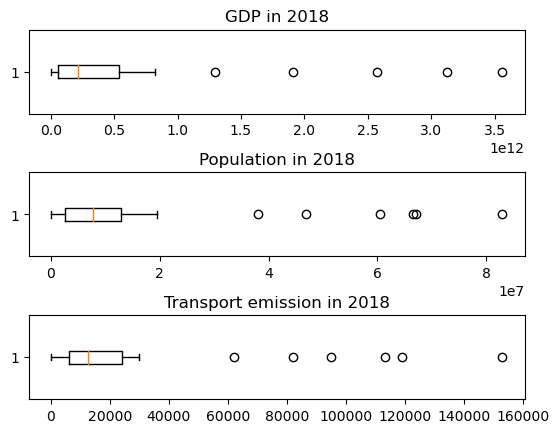

In [13]:
fig, ax = plt.subplots(3, 1)

ax[0].boxplot(df.query("year == 2018")["gdp"], vert = False)
ax[0].set_title('GDP in 2018')

ax[1].boxplot(df.query("year == 2018")["pop"], vert = False)
ax[1].set_title('Population in 2018')

ax[2].boxplot(df.query("year == 2018")["transport.emissions"], vert = False)
ax[2].set_title('Transport emission in 2018')

fig.subplots_adjust(hspace = 0.7)

### Time-series plot

In [14]:
df_plot = df.dropna()
year = df_plot.year.unique()
df_plot

,country,year,transport.emissions,gdp,pop
0,Austria,1970,7679.742167,1.351691e+11,7467086.0
1,Austria,1971,8464.743388,1.420830e+11,7500482.0
2,Austria,1972,9479.252474,1.509033e+11,7544201.0
3,Austria,1973,10294.920170,1.582831e+11,7586115.0
4,Austria,1974,9561.188741,1.645229e+11,7599038.0
...,...,...,...,...,...
1659,United Kingdom,2017,114792.191025,3.071672e+12,66058859.0
1660,United Kingdom,2018,113296.303136,3.124044e+12,66460344.0
1661,United Kingdom,2019,111032.923450,3.174164e+12,66836327.0
1662,United Kingdom,2020,85276.818061,2.824026e+12,67081000.0


Text(0.5, 1.0, 'Time-seris: Transport emissions for all countries in EU')

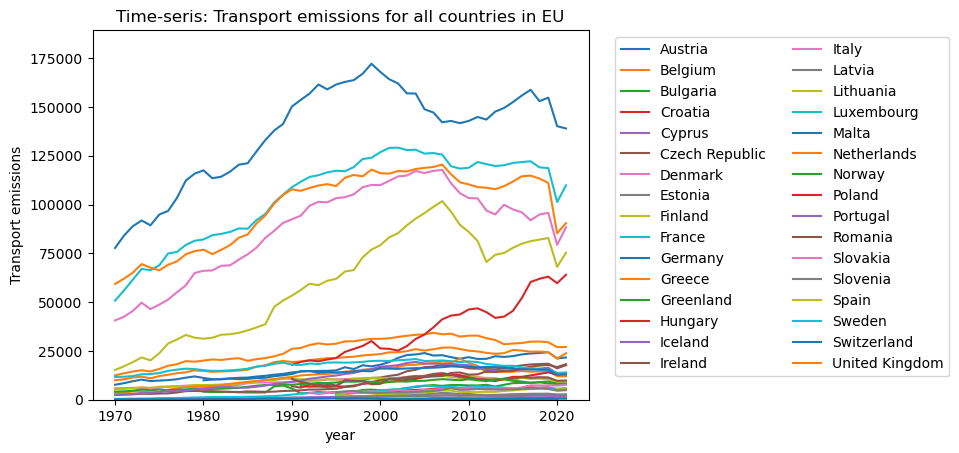

In [15]:
all_country = df_plot["country"].unique().tolist()

for country in all_country:
    plt.plot(df_plot.loc[df_plot["country"] == country, "year"], df_plot.loc[df_plot["country"] == country, "transport.emissions"], label = country)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", ncol = 2)
plt.ylim((0,df_plot["transport.emissions"].max()*1.1))
plt.xlabel("year")
plt.ylabel("Transport emissions")
plt.title("Time-seris: Transport emissions for all countries in EU")

Text(0.5, 1.0, 'Time-seris: Transport emissions for Top 6 countries in EU')

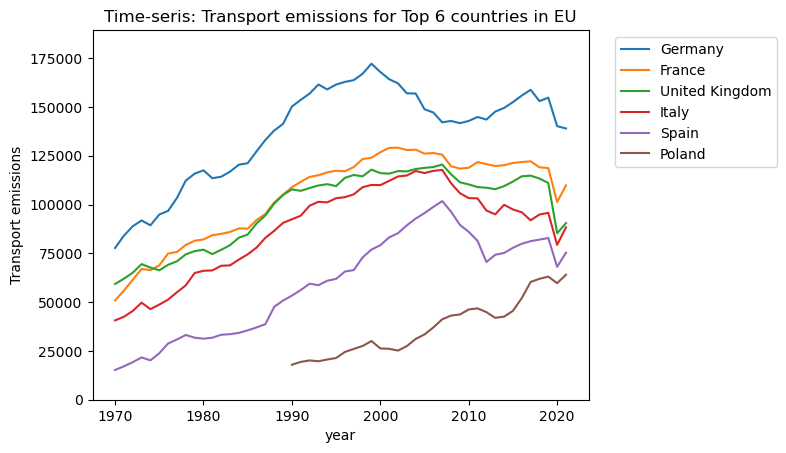

In [16]:
top_country = ["Germany", "France", "United Kingdom", "Italy", "Spain", "Poland"]

for country in top_country:
    plt.plot(df_plot.loc[df_plot["country"] == country, "year"], df_plot.loc[df_plot["country"] == country, "transport.emissions"], label = country)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.ylim((0,df_plot["transport.emissions"].max()*1.1))
plt.xlabel("year")
plt.ylabel("Transport emissions")
plt.title("Time-seris: Transport emissions for Top 6 countries in EU")

Text(0.5, 1.0, 'Time-seris: Transport emissions for all countries but top 6 in EU')

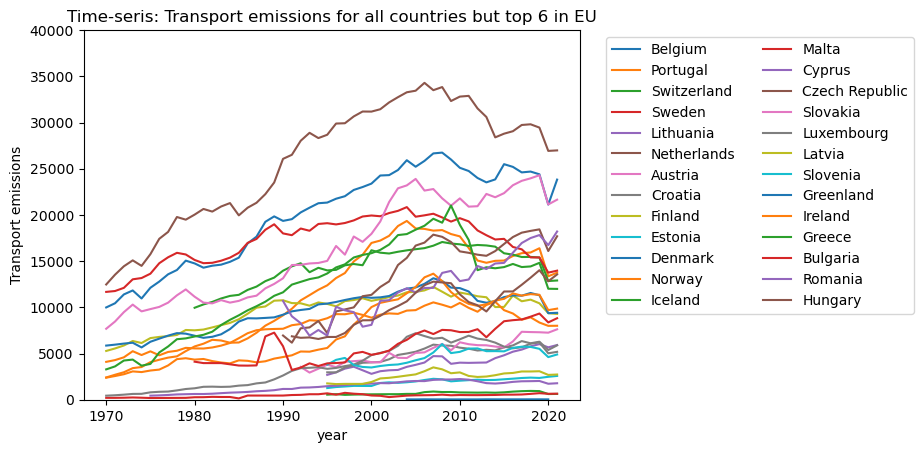

In [17]:
all_country = df_plot["country"].unique().tolist()
all_but_top5_country = list(set(all_country) - set(top_country))

for country in all_but_top5_country:
    plt.plot(df_plot.loc[df_plot["country"] == country, "year"], df_plot.loc[df_plot["country"] == country, "transport.emissions"], label = country)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", ncol = 2)
plt.ylim((0,40000))
plt.xlabel("year")
plt.ylabel("Transport emissions")
plt.title("Time-seris: Transport emissions for all countries but top 6 in EU")

### Relationships

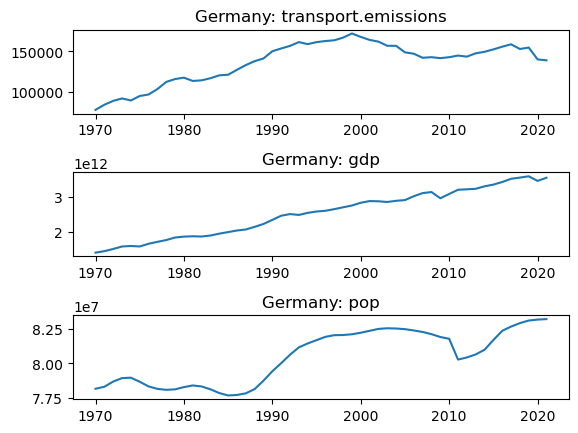

In [18]:
col_plot = ["transport.emissions", "gdp", "pop"]

fig, ax = plt.subplots(len(col_plot), 1)


for i in range(len(col_plot)):
    ax[i].plot(year, df_plot.loc[df_plot["country"] == "Germany",col_plot[i]])
    ax[i].set_title( "Germany: " + col_plot[i])


fig.subplots_adjust(hspace = 0.7)

## Linear regression

### simple ols

In [19]:
df_Germany = df.loc[df["country"] == "Germany", :].dropna()

y = df_Germany['transport.emissions']
x = df_Germany[["gdp", "pop"]]
x = sm.add_constant(x)

result_ols = sm.OLS(y, x).fit()
result_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     transport.emissions   R-squared:                       0.640
Model:                             OLS   Adj. R-squared:                  0.626
Method:                  Least Squares   F-statistic:                     43.61
Date:                 Tue, 04 Apr 2023   Prob (F-statistic):           1.32e-11
Time:                         16:59:20   Log-Likelihood:                -573.85
No. Observations:                   52   AIC:                             1154.
Df Residuals:                       49   BIC:                             1160.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.669e+05   1.72e+05     -1.552      0.127   -6.13e+05    7.88e+04
gdp         1.856e-08   6.63e-09      2.801      0.007    5.24e-09    3.19e-08
pop            0.0044      0.002      1.914      0.062      -0.000       0.009
==============================================================================
Omnibus:                        7.318   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                2.548
Skew:                          -0.113   Prob(JB):                        0.280
Kurtosis:                       1.939   Cond. No.                     2.10e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### log-log model

In [20]:
df_Germany['ln_transport.emissions'] = np.log(df_Germany['transport.emissions'])
df_Germany['ln_gdp'] = np.log(df_Germany['gdp'])
df_Germany['ln_pop'] = np.log(df_Germany['pop'])

y = df_Germany['ln_transport.emissions']
x = df_Germany[["ln_gdp", "ln_pop"]]
x = sm.add_constant(x)

result_ols_ln = sm.OLS(y, x).fit()
result_ols_ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ln_transport.emissions   R-squared:                       0.724
Model:                                OLS   Adj. R-squared:                  0.712
Method:                     Least Squares   F-statistic:                     64.16
Date:                    Tue, 04 Apr 2023   Prob (F-statistic):           2.06e-14
Time:                            16:59:20   Log-Likelihood:                 42.470
No. Observations:                      52   AIC:                            -78.94
Df Residuals:                          49   BIC:                            -73.09
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2316     21.090     -0.295      0.769     -48.613      36.150
ln_gdp         0.6215      0.111      5.609      0.000       0.399       0.844
ln_pop         0.0171      1.306      0.013      0.990      -2.608       2.642
==============================================================================
Omnibus:                       12.576   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                3.134
Skew:                           0.027   Prob(JB):                        0.209
Kurtosis:                       1.798   Cond. No.                     4.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### squared

In [21]:
df_Germany['sq_gdp'] = df_Germany['gdp']**2
df_Germany['sq_pop'] = df_Germany['pop']**2

y = df_Germany['transport.emissions']
x = df_Germany[["gdp", "pop", "sq_gdp", "sq_pop"]]
x = sm.add_constant(x)

result_ols_sq = sm.OLS(y, x).fit()
result_ols_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     transport.emissions   R-squared:                       0.857
Model:                             OLS   Adj. R-squared:                  0.851
Method:                  Least Squares   F-statistic:                     146.9
Date:                 Tue, 04 Apr 2023   Prob (F-statistic):           1.99e-21
Time:                         16:59:21   Log-Likelihood:                -549.85
No. Observations:                   52   AIC:                             1106.
Df Residuals:                       49   BIC:                             1112.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.336e-21   8.31e-22     10.034      0.000    6.67e-21       1e-20
gdp         1.908e-07    1.9e-08     10.034      0.000    1.53e-07    2.29e-07
pop         3.463e-13   3.45e-14     10.034      0.000    2.77e-13    4.16e-13
sq_gdp     -3.069e-20   3.48e-21     -8.810      0.000   -3.77e-20   -2.37e-20
sq_pop     -2.096e-11   3.81e-12     -5.499      0.000   -2.86e-11   -1.33e-11
==============================================================================
Omnibus:                        3.702   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                2.323
Skew:                           0.309   Prob(JB):                        0.313
Kurtosis:                       2.169   Cond. No.                     2.45e+28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+28. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### lag

In [22]:
df_Germany['lag_gdp'] = df_Germany['gdp'].shift() 
df_Germany['lag_pop'] = df_Germany['pop'].shift() 

y = df_Germany['transport.emissions'].iloc[1:,]
x = df_Germany[["gdp", "pop", "lag_gdp", "lag_pop"]].dropna()
x = sm.add_constant(x)

result_ols_lag = sm.OLS(y, x).fit()
result_ols_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     transport.emissions   R-squared:                       0.663
Model:                             OLS   Adj. R-squared:                  0.634
Method:                  Least Squares   F-statistic:                     22.66
Date:                 Tue, 04 Apr 2023   Prob (F-statistic):           2.17e-10
Time:                         16:59:21   Log-Likelihood:                -558.66
No. Observations:                   51   AIC:                             1127.
Df Residuals:                       46   BIC:                             1137.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.853e+05   1.68e+05     -1.703      0.095   -6.23e+05    5.18e+04
gdp          5.54e-08   3.82e-08      1.451      0.154   -2.15e-08    1.32e-07
pop            0.0165      0.006      2.689      0.010       0.004       0.029
lag_gdp    -3.944e-08   3.87e-08     -1.019      0.314   -1.17e-07    3.85e-08
lag_pop       -0.0118      0.006     -1.959      0.056      -0.024       0.000
==============================================================================
Omnibus:                        4.036   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                2.706
Skew:                          -0.386   Prob(JB):                        0.258
Kurtosis:                       2.177   Cond. No.                     3.04e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Fit

Text(0.5, 1.0, 'Model fitting')

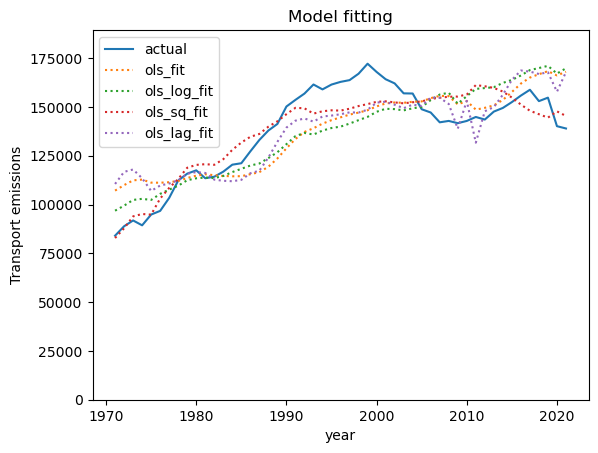

In [23]:
# drop 1st obs. due to lag model.
results = {
    "ols_fit": result_ols.fittedvalues.iloc[1:,],
    "ols_log_fit": np.exp(result_ols_ln.fittedvalues).iloc[1:,],
    "ols_sq_fit": result_ols_sq.fittedvalues.iloc[1:,],
    "ols_lag_fit": result_ols_lag.fittedvalues
}

plt.plot(df_Germany.year.iloc[1:,], df_Germany["transport.emissions"].iloc[1:,], label = "actual")

for i in ['ols_fit', 'ols_log_fit', 'ols_sq_fit', 'ols_lag_fit']:
    plt.plot(df_Germany.year.iloc[1:,], results[i], label = i, ls = "dotted")

plt.legend()
plt.ylim((0,df_Germany["transport.emissions"].max()*1.1))
plt.xlabel("year")
plt.ylabel("Transport emissions")
plt.title("Model fitting")

## Plots for thesis

In [24]:
df_table1 = df.dropna().groupby("country")["year"].aggregate(["min", "max", "count"]).reset_index().sort_values(["count", "country"], ascending = [False, True]).rename(columns = {"min": "First", "max": "Last", "count": "observations"})
df_table1

,country,First,Last,observations
0,Austria,1970,2021,52
1,Belgium,1970,2021,52
6,Denmark,1970,2021,52
8,Finland,1970,2021,52
9,France,1970,2021,52
10,Germany,1970,2021,52
11,Greece,1970,2021,52
15,Ireland,1970,2021,52
16,Italy,1970,2021,52
19,Luxembourg,1970,2021,52


### summary statistics

In [25]:
country_sample = df_table1[df_table1["observations"] == 52].country.unique().tolist()
# remove Norway since it is not EU
country_sample.remove("Norway")
print(len(country_sample))
country_sample

16


['Austria',
 'Belgium',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Ireland',
 'Italy',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Portugal',
 'Spain',
 'Sweden',
 'United Kingdom']

In [26]:
df_summary_table_emissions = df.loc[df["country"].isin(country_sample), ["country", "transport.emissions"]].dropna().groupby("country").describe()
df_summary_table_emissions.columns = df_summary_table_emissions.columns.get_level_values(1)
df_summary_table_emissions.drop(["25%", "75%"], axis = 1, inplace = True)
df_summary_table_emissions.rename(columns = {"50%": "median"}, inplace = True)
df_summary_table_emissions["count"] = df_summary_table_emissions["count"].astype(int)
df_summary_table_emissions[["mean", "std", "min", "median", "max"]] = df_summary_table_emissions[["mean", "std", "min", "median", "max"]].round(2)
df_summary_table_emissions

,count,mean,std,min,median,max
country,,,,,,
Austria,52,16327.06,5417.96,7679.74,15363.96,24297.81
Belgium,52,20001.65,5166.99,9987.14,21300.81,26744.27
Denmark,52,9543.00,2174.13,5659.96,10072.29,13146.64
Finland,52,9593.54,1916.11,5278.39,10401.89,12209.87
France,52,104352.48,22331.49,50795.67,115731.80,129105.03
Germany,52,136890.60,25275.40,77720.68,143162.76,172114.71
Greece,52,12109.93,4915.55,3284.46,13144.03,21017.01
Ireland,52,7342.62,3564.13,2386.42,6059.31,13641.91
Italy,52,87591.10,23001.65,40634.92,94912.39,117740.22


In [27]:
print(df_summary_table_emissions.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  count &       mean &       std &       min &     median &        max \\
country        &        &            &           &           &            &            \\
\midrule
Austria        &     52 &   16327.06 &   5417.96 &   7679.74 &   15363.96 &   24297.81 \\
Belgium        &     52 &   20001.65 &   5166.99 &   9987.14 &   21300.81 &   26744.27 \\
Denmark        &     52 &    9543.00 &   2174.13 &   5659.96 &   10072.29 &   13146.64 \\
Finland        &     52 &    9593.54 &   1916.11 &   5278.39 &   10401.89 &   12209.87 \\
France         &     52 &  104352.48 &  22331.49 &  50795.67 &  115731.80 &  129105.03 \\
Germany        &     52 &  136890.60 &  25275.40 &  77720.68 &  143162.76 &  172114.71 \\
Greece         &     52 &   12109.93 &   4915.55 &   3284.46 &   13144.03 &   21017.01 \\
Ireland        &     52 &    7342.62 &   3564.13 &   2386.42 &    6059.31 &   13641.91 \\
Italy          &     52 &   87591.10 &  23001.65 &  40634.92 &   9491

/var/folders/1h/c8s0c0bs03g7z8xzm_4_6dq40000gn/T/ipykernel_45559/3446109892.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_summary_table_emissions.to_latex())


In [28]:
df_summary_table_gdp = df.loc[df["country"].isin(country_sample), ["country", "gdp"]].dropna().groupby("country").describe()
df_summary_table_gdp.columns = df_summary_table_gdp.columns.get_level_values(1)
df_summary_table_gdp.drop(["25%", "75%"], axis = 1, inplace = True)
df_summary_table_gdp.rename(columns = {"50%": "median"}, inplace = True)
df_summary_table_gdp["count"] = df_summary_table_gdp["count"].astype(int)
for i in ["mean", "std", "min", "median", "max"]:
    df_summary_table_gdp[i] = df_summary_table_gdp[i].map('{:,.2e}'.format)
df_summary_table_gdp

,count,mean,std,min,median,max
country,,,,,,
Austria,52,2.77e+11,8.59e+10,1.35e+11,2.72e+11,4.14e+11
Belgium,52,3.33e+11,9.87e+10,1.72e+11,3.20e+11,4.97e+11
Denmark,52,2.32e+11,6.24e+10,1.33e+11,2.30e+11,3.42e+11
Finland,52,1.72e+11,5.79e+10,7.89e+10,1.57e+11,2.57e+11
France,52,1.82e+12,5.17e+11,9.11e+11,1.78e+12,2.62e+12
Germany,52,2.53e+12,6.68e+11,1.40e+12,2.59e+12,3.60e+12
Greece,52,1.77e+11,4.35e+10,9.43e+10,1.71e+11,2.66e+11
Ireland,52,1.48e+11,1.06e+11,3.59e+10,1.06e+11,4.48e+11
Italy,52,1.57e+12,3.52e+11,8.47e+11,1.67e+12,1.99e+12


In [29]:
print(df_summary_table_gdp.to_latex())

\begin{tabular}{lrlllll}
\toprule
{} &  count &      mean &       std &       min &    median &       max \\
country        &        &           &           &           &           &           \\
\midrule
Austria        &     52 &  2.77e+11 &  8.59e+10 &  1.35e+11 &  2.72e+11 &  4.14e+11 \\
Belgium        &     52 &  3.33e+11 &  9.87e+10 &  1.72e+11 &  3.20e+11 &  4.97e+11 \\
Denmark        &     52 &  2.32e+11 &  6.24e+10 &  1.33e+11 &  2.30e+11 &  3.42e+11 \\
Finland        &     52 &  1.72e+11 &  5.79e+10 &  7.89e+10 &  1.57e+11 &  2.57e+11 \\
France         &     52 &  1.82e+12 &  5.17e+11 &  9.11e+11 &  1.78e+12 &  2.62e+12 \\
Germany        &     52 &  2.53e+12 &  6.68e+11 &  1.40e+12 &  2.59e+12 &  3.60e+12 \\
Greece         &     52 &  1.77e+11 &  4.35e+10 &  9.43e+10 &  1.71e+11 &  2.66e+11 \\
Ireland        &     52 &  1.48e+11 &  1.06e+11 &  3.59e+10 &  1.06e+11 &  4.48e+11 \\
Italy          &     52 &  1.57e+12 &  3.52e+11 &  8.47e+11 &  1.67e+12 &  1.99e+12 \\
Luxembourg  

/var/folders/1h/c8s0c0bs03g7z8xzm_4_6dq40000gn/T/ipykernel_45559/1592298107.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_summary_table_gdp.to_latex())


In [30]:
df_summary_table_pop = df.loc[df["country"].isin(country_sample), ["country", "pop"]].dropna().groupby("country").describe()
df_summary_table_pop.columns = df_summary_table_pop.columns.get_level_values(1)
df_summary_table_pop.drop(["25%", "75%"], axis = 1, inplace = True)
df_summary_table_pop.rename(columns = {"50%": "median"}, inplace = True)
df_summary_table_pop["count"] = df_summary_table_pop["count"].astype(int)
for i in ["mean", "std", "min", "median", "max"]:
    df_summary_table_pop[i] = df_summary_table_pop[i].map('{:,.2e}'.format)
df_summary_table_pop

,count,mean,std,min,median,max
country,,,,,,
Austria,52,8.00e+06,4.51e+05,7.47e+06,7.95e+06,8.96e+06
Belgium,52,1.03e+07,5.92e+05,9.66e+06,1.01e+07,1.16e+07
Denmark,52,5.32e+06,2.57e+05,4.93e+06,5.25e+06,5.86e+06
Finland,52,5.09e+06,2.86e+05,4.61e+06,5.12e+06,5.54e+06
France,52,6.00e+07,4.87e+06,5.17e+07,5.97e+07,6.77e+07
Germany,52,8.05e+07,1.91e+06,7.77e+07,8.08e+07,8.32e+07
Greece,52,1.03e+07,7.19e+05,8.79e+06,1.06e+07,1.11e+07
Ireland,52,3.87e+06,6.01e+05,2.96e+06,3.62e+06,5.03e+06
Italy,52,5.74e+07,1.76e+06,5.38e+07,5.69e+07,6.08e+07


In [31]:
print(df_summary_table_pop.to_latex())

\begin{tabular}{lrlllll}
\toprule
{} &  count &      mean &       std &       min &    median &       max \\
country        &        &           &           &           &           &           \\
\midrule
Austria        &     52 &  8.00e+06 &  4.51e+05 &  7.47e+06 &  7.95e+06 &  8.96e+06 \\
Belgium        &     52 &  1.03e+07 &  5.92e+05 &  9.66e+06 &  1.01e+07 &  1.16e+07 \\
Denmark        &     52 &  5.32e+06 &  2.57e+05 &  4.93e+06 &  5.25e+06 &  5.86e+06 \\
Finland        &     52 &  5.09e+06 &  2.86e+05 &  4.61e+06 &  5.12e+06 &  5.54e+06 \\
France         &     52 &  6.00e+07 &  4.87e+06 &  5.17e+07 &  5.97e+07 &  6.77e+07 \\
Germany        &     52 &  8.05e+07 &  1.91e+06 &  7.77e+07 &  8.08e+07 &  8.32e+07 \\
Greece         &     52 &  1.03e+07 &  7.19e+05 &  8.79e+06 &  1.06e+07 &  1.11e+07 \\
Ireland        &     52 &  3.87e+06 &  6.01e+05 &  2.96e+06 &  3.62e+06 &  5.03e+06 \\
Italy          &     52 &  5.74e+07 &  1.76e+06 &  5.38e+07 &  5.69e+07 &  6.08e+07 \\
Luxembourg  

/var/folders/1h/c8s0c0bs03g7z8xzm_4_6dq40000gn/T/ipykernel_45559/3233250787.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_summary_table_pop.to_latex())


### Time-series plot

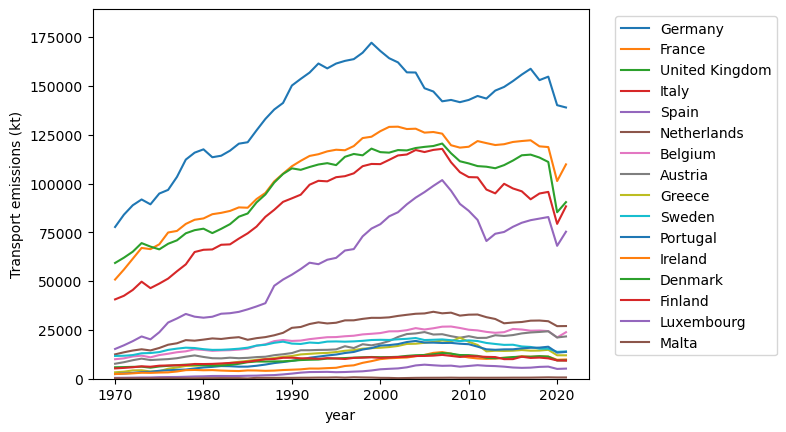

In [32]:
country_sample_plot = df_summary_table_emissions.sort_values("max", ascending = False).index

for country in country_sample_plot:
    plt.plot(df_plot.loc[df_plot["country"] == country, "year"], df_plot.loc[df_plot["country"] == country, "transport.emissions"], label = country)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", ncol = 1)
plt.ylim((0,df_plot["transport.emissions"].max()*1.1))
plt.xlabel("year")
plt.ylabel("Transport emissions (kt)")
plt.savefig("time-series.png")

In [33]:
# # List up the countries that show decrease in skewness by taking a logarithm
# # Population: Malta, Luxembourg, Ireland

# skew_co2 = []
# skew_gdp = []
# skew_pop = []
# skew_diff_co2 = []
# skew_diff_gdp = []
# skew_diff_pop = []

# for i in range(len(country_sample_plot)):
#     skew_val_original_co2 = skew(df_plot.loc[df_plot["country"] == country_sample_plot[i], ["transport.emissions"]]).item()
#     skew_val_log_co2 = skew(df_plot.loc[df_plot["country"] == country_sample_plot[i], ["log_transport.emissions"]]).item()
#     skew_co2.append(skew_val_original_co2)
#     skew_diff_co2.append(skew_val_original_co2- skew_val_log_co2)
    
#     skew_val_original_gdp = skew(df_plot.loc[df_plot["country"] == country_sample_plot[i], ["gdp"]]).item()
#     skew_val_log_gdp = skew(df_plot.loc[df_plot["country"] == country_sample_plot[i], ["log_gdp"]]).item()
#     skew_gdp.append(skew_val_original_gdp)
#     skew_diff_gdp.append(skew_val_original_gdp-skew_val_log_gdp)
    
#     skew_val_original_pop = skew(df_plot.loc[df_plot["country"] == country_sample_plot[i], ["pop"]]).item()
#     skew_val_log_pop = skew(df_plot.loc[df_plot["country"] == country_sample_plot[i], ["log_pop"]]).item()
#     skew_pop.append(skew_val_original_pop)
#     skew_diff_pop.append(skew_val_original_pop-skew_val_log_pop)
    

    
# df_skew = pd.DataFrame(data = {
#     "country": country_sample_plot,
#     "transport.emissions": skew_co2,
#     "gdp": skew_gdp,
#     "pop": skew_pop,
#     "transport.emissions_diff": skew_diff_co2,
#     "gdp_diff": skew_diff_gdp,
#     "pop_diff": skew_diff_pop
# })

# df_skew

### Pick up countries for empirical study

In [34]:
# Group A: High GDP & POP , Group B: Low GDP & POP
df_summary_table_pop["max"] = df_summary_table_pop["max"].astype(float)
df_summary_table_gdp["max"] = df_summary_table_gdp["max"].astype(float)
df_summary_table_pop["min"] = df_summary_table_pop["min"].astype(float)
df_summary_table_gdp["min"] = df_summary_table_gdp["min"].astype(float)
country_bottom_pop = df_summary_table_pop.sort_values("min").index[0:3].tolist()
country_top_pop = df_summary_table_pop.sort_values("max", ascending = False).index[0:3].tolist()
country_bottom_gdp = df_summary_table_gdp.sort_values("min").index[0:3].tolist()
country_top_gdp = df_summary_table_gdp.sort_values("max", ascending = False).index[0:3].tolist()

print("top: ", set(country_top_pop) & set(country_top_gdp))
print("bottom: ", set(country_bottom_pop) & set(country_bottom_gdp))

top:  {'United Kingdom', 'Germany', 'France'}
bottom:  {'Malta', 'Ireland', 'Luxembourg'}


In [35]:
top3_countries = list(set(country_top_pop) & set(country_top_gdp))
top3_countries

['United Kingdom', 'Germany', 'France']

In [36]:
bottom3_countries = list(set(country_bottom_pop) & set(country_bottom_gdp))
bottom3_countries

['Malta', 'Ireland', 'Luxembourg']

### Histogram

In [38]:
countries_plot = top3_countries + bottom3_countries
countries_plot

['United Kingdom', 'Germany', 'France', 'Malta', 'Ireland', 'Luxembourg']

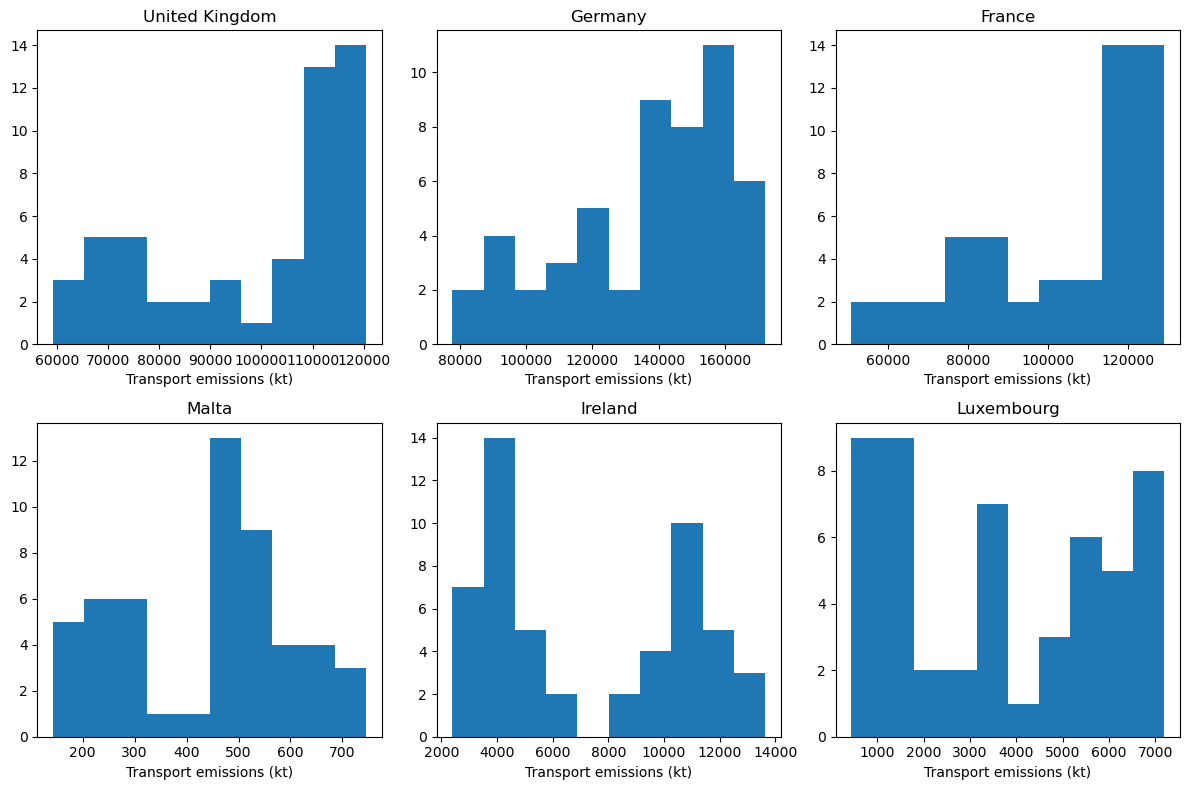

In [48]:
fig, ax = plt.subplots(2, int(len(countries_plot)/2), figsize=(12, 8))
for country, ax in zip(countries_plot, ax.ravel()):
    ax.hist(df_plot.loc[df_plot["country"] == country, "transport.emissions"])
    ax.set_title(country)
    ax.set_xlabel("Transport emissions (kt)")
    
fig.tight_layout()

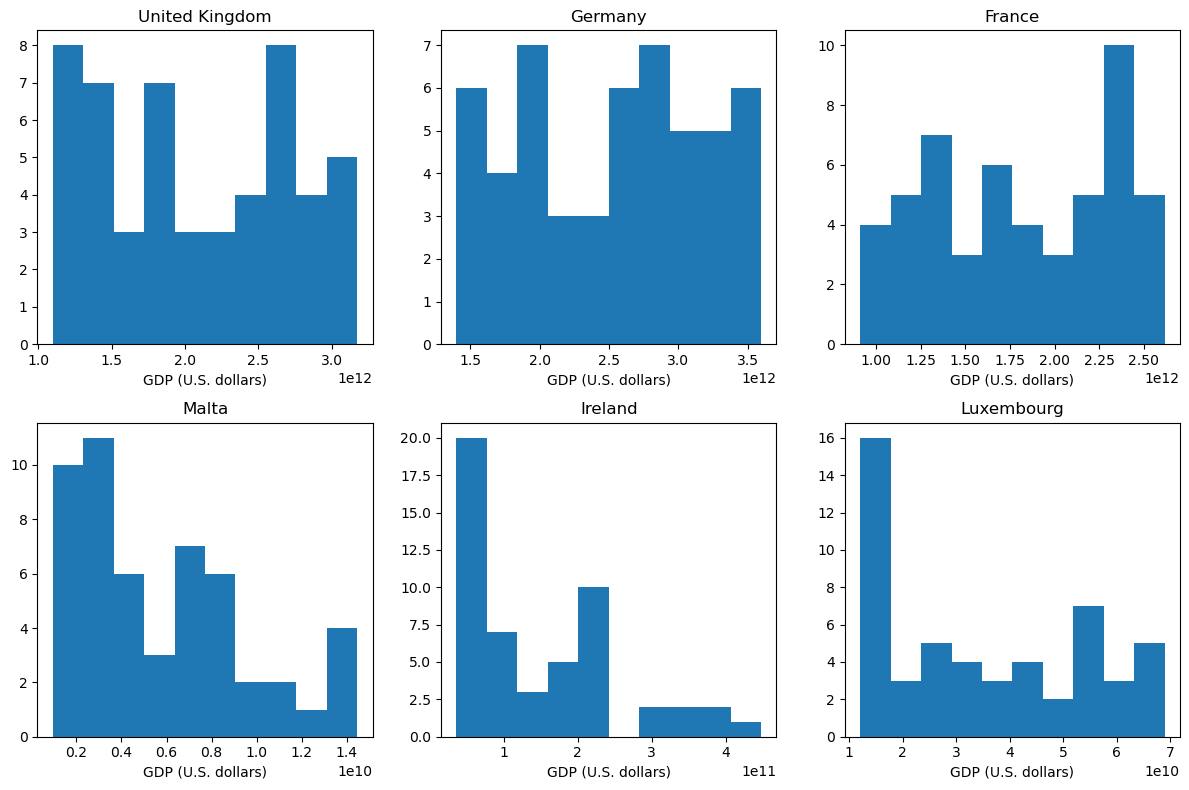

In [51]:
fig, ax = plt.subplots(2, int(len(countries_plot)/2), figsize=(12, 8))
for country, ax in zip(countries_plot, ax.ravel()):
    ax.hist(df_plot.loc[df_plot["country"] == country, "gdp"])
    ax.set_title(country)
    ax.set_xlabel("GDP (U.S. dollars)")
    
fig.tight_layout()

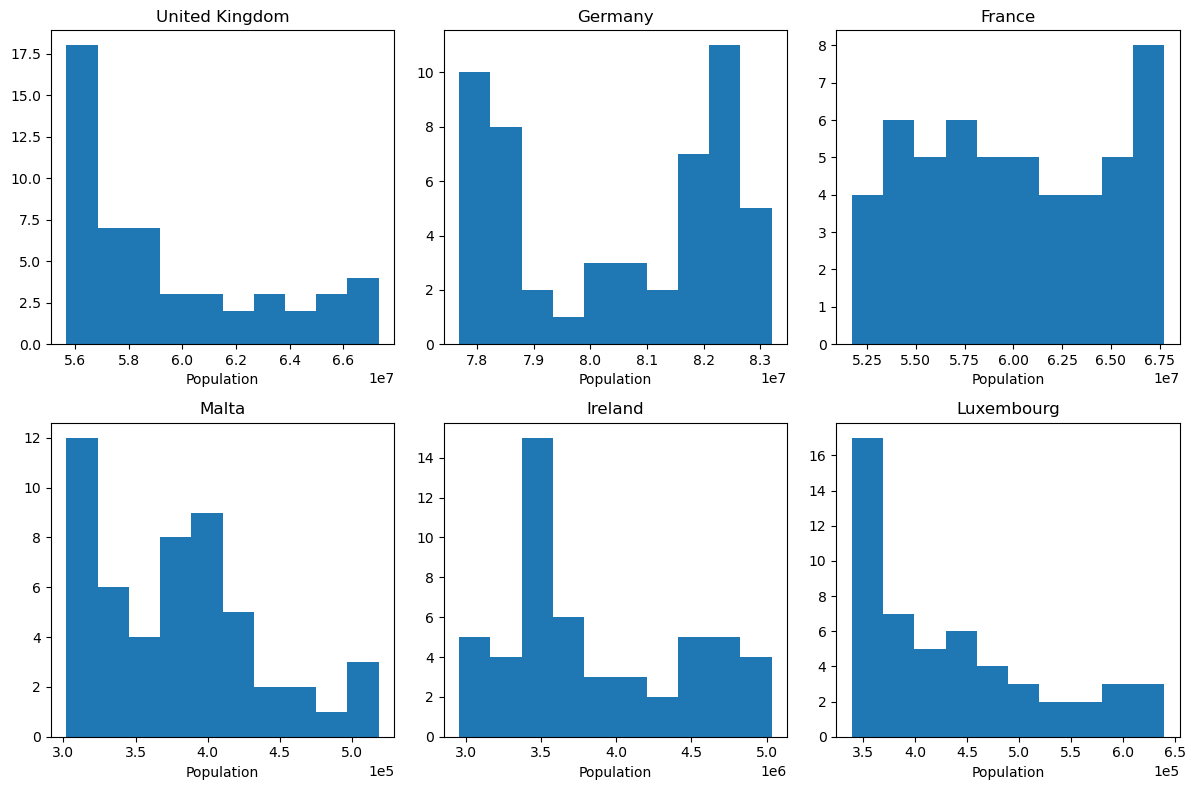

In [54]:
fig, ax = plt.subplots(2, int(len(countries_plot)/2), figsize=(12, 8))
for country, ax in zip(countries_plot, ax.ravel()):
    ax.hist(df_plot.loc[df_plot["country"] == country, "pop"])
    ax.set_title(country)
    ax.set_xlabel("Population")
    ax.ticklabel_format(axis = 'x', scilimits = [-5, 5])
    
fig.tight_layout()

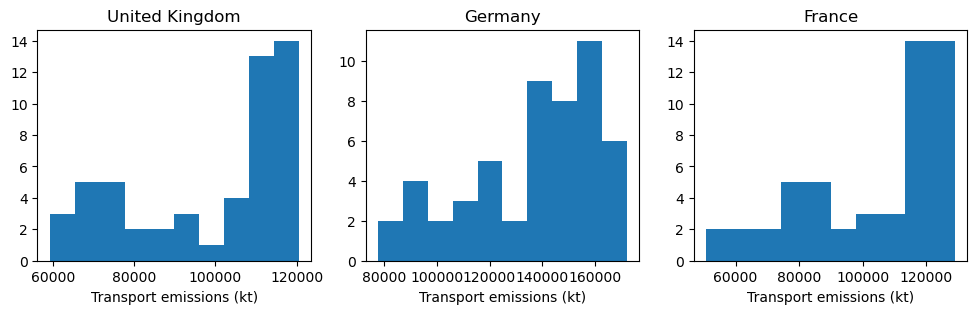

In [49]:
fig, ax = plt.subplots(1, len(top3_countries), figsize=(12, 3))
for i in range(len(bottom3_countries)):
    ax[i].hist(df_plot.loc[df_plot["country"] == top3_countries[i], "transport.emissions"])
    ax[i].set_title(top3_countries[i])
    ax[i].set_xlabel("Transport emissions (kt)")

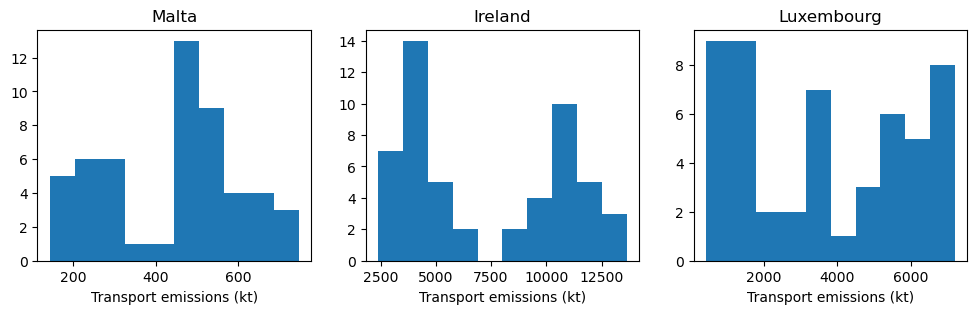

In [50]:
fig, ax = plt.subplots(1, len(bottom3_countries), figsize=(12, 3))
for i in range(len(bottom3_countries)):
    ax[i].hist(df_plot.loc[df_plot["country"] == bottom3_countries[i], "transport.emissions"])
    ax[i].set_title(bottom3_countries[i])
    ax[i].set_xlabel("Transport emissions (kt)")

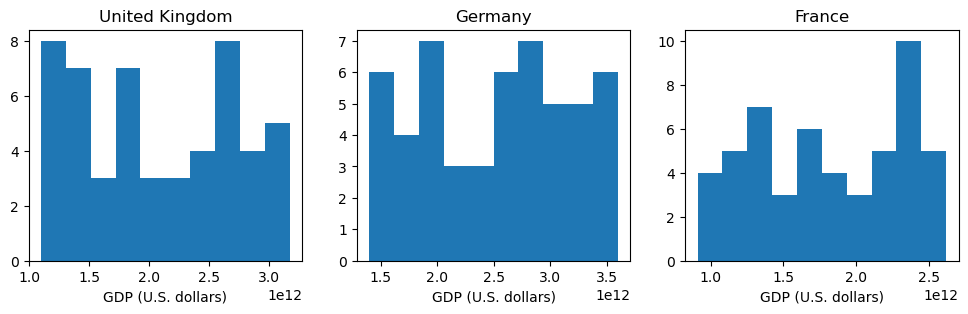

In [43]:
fig, ax = plt.subplots(1, len(top3_countries), figsize=(12, 3))
for i in range(len(top3_countries)):
    ax[i].hist(df_plot.loc[df_plot["country"] == top3_countries[i], "gdp"])
    ax[i].set_title(top3_countries[i])
    ax[i].set_xlabel("GDP (U.S. dollars)")

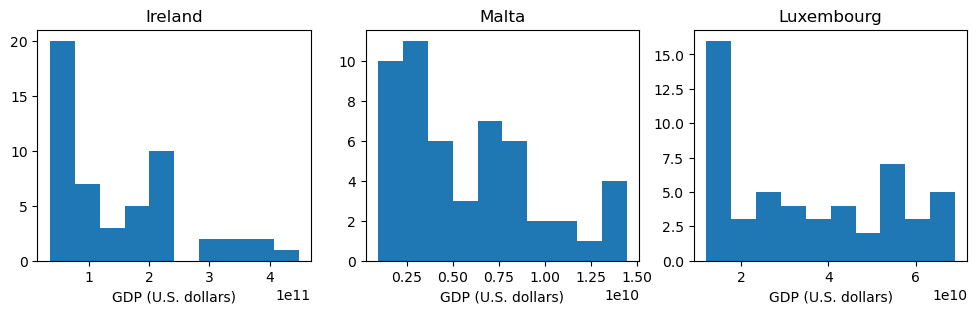

In [52]:
fig, ax = plt.subplots(1, len(bottom3_countries), figsize=(12, 3))
for i in range(len(bottom3_countries)):
    ax[i].hist(df_plot.loc[df_plot["country"] == bottom3_countries[i], "gdp"])
    ax[i].set_title(bottom3_countries[i])
    ax[i].set_xlabel("GDP (U.S. dollars)")

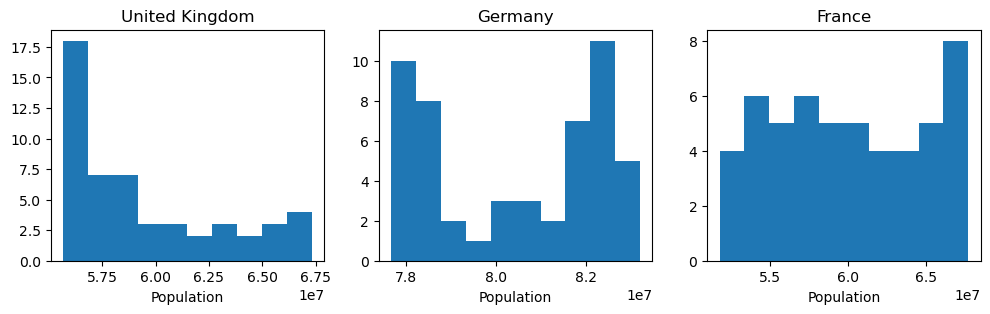

In [40]:
fig, ax = plt.subplots(1, len(top3_countries), figsize=(12, 3))
for i in range(len(top3_countries)):
    ax[i].hist(df_plot.loc[df_plot["country"] == top3_countries[i], "pop"])
    ax[i].set_title(top3_countries[i])
    ax[i].set_xlabel("Population")

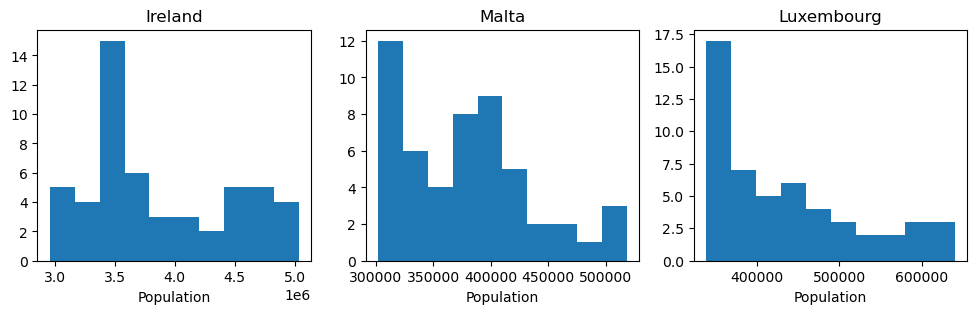

In [51]:
fig, ax = plt.subplots(1, len(bottom3_countries), figsize=(12, 3))
for i in range(len(bottom3_countries)):
    ax[i].hist(df_plot.loc[df_plot["country"] == bottom3_countries[i], "pop"])
    ax[i].set_title(bottom3_countries[i])
    ax[i].set_xlabel("Population")